# Enigma 004 : The Monty Hall Problem

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
#import matplotlib
from qiskit.circuit.library import MCXGate, HGate
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

**Question 1 : Write a circuit that would only use 3 qubits instead of 4 for Enigma 004 The Monty Hall Problem.**

*HINT 1*

Use only two qubits to hide the diamond.


*HINT 2*

Find a way to obtain 1/3 probability of measuring 00, 01, and 10 (the binary equivalent of 0, 1, and 2).

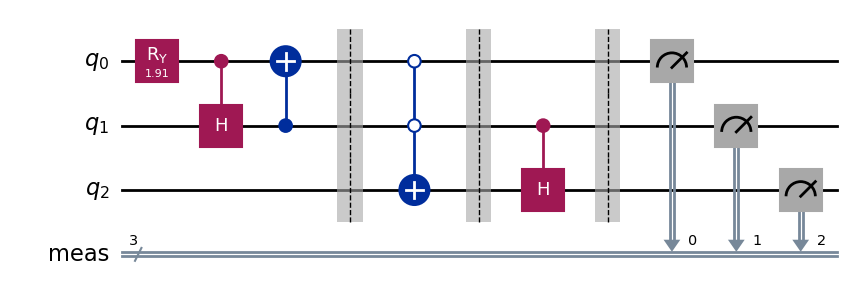

In [58]:
problem_qc = QuantumCircuit(3)

#Placing the diamond with 1/3 probability for each measure of 00, 01, and 10.
problem_qc.ry(1.910633, 0)
problem_qc.ch(0, 1)
problem_qc.cx(1, 0)

problem_qc.barrier()
#Opening safe 1 if the diamond is in safe 0
problem_qc.mcx([0, 1], 2, ctrl_state='00')
problem_qc.barrier()
#Opening safe 0 or 1 if the diamond is in safe 2
problem_qc.ch(1, 2)


problem_qc.measure_all()
problem_qc.draw("mpl")

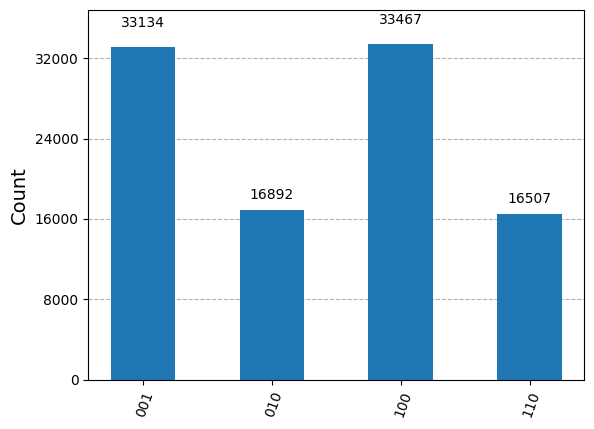

In [61]:
circuit = problem_qc
sim_test = AerSimulator()
result_test = sim_test.run(transpile(circuit, sim_test), shots=100000).result()
counts_test = result_test.get_counts(circuit)

plot_histogram(counts_test)

**Question 2 : Write a circuit that would randomly determine the chest you choose at the start (using three qubits for hiding the diamond as in the enigma).**

*HINT 1*

You can use q3, q4, and q5 to determine the safe you put your hand on at first and q6, q7, and q8 to determine which safe will be opened (safe 0 is linked to q0, q3, and q6; safe 1 is linked to q1, q4, and q7; safe 2 is linked to q2, q5, and q8).

*HINT 2*

You can use the following circuit that is the equivalent of a multicontrolled Hadamard gate.

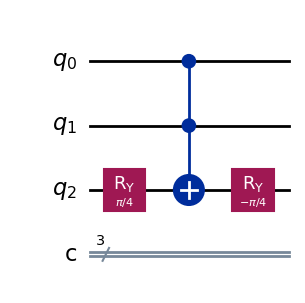

In [25]:
problem_qc = QuantumCircuit(3, 3)

problem_qc.ry(np.pi/4, 2)
problem_qc.mcx([0, 1], 2)
problem_qc.ry(-np.pi/4, 2)

problem_qc.draw("mpl")

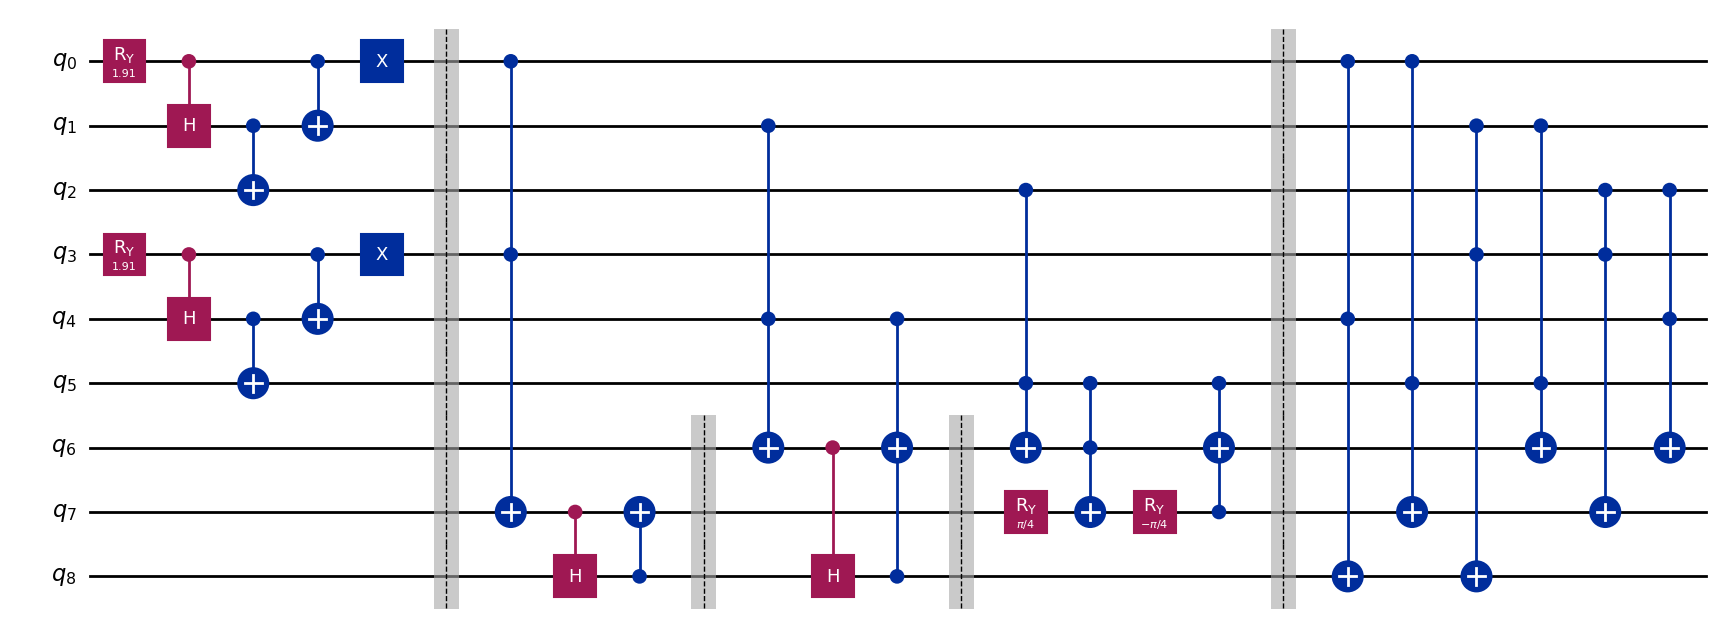

In [28]:
problem2_qc = QuantumCircuit(9)

#hidding the diamond in one of the three safes
problem2_qc.ry(1.910633, 0)
problem2_qc.ch(0, 1)
problem2_qc.cx(1, 2)
problem2_qc.cx(0, 1)
problem2_qc.x(0)

#putting the hand on one of the three safes

problem2_qc.ry(1.910633, 3)
problem2_qc.ch(3, 4)
problem2_qc.cx(4, 5)
problem2_qc.cx(3, 4)
problem2_qc.x(3)
problem2_qc.barrier()

# il y a 3^2 = 9 combinaisons possibles de coffres et de mains

#door to open in case diamond and hand are on 0
problem2_qc.mcx([0, 3], 7)
problem2_qc.ch(7, 8)
problem2_qc.cx(8, 7)
problem2_qc.barrier(6, 7 , 8)

#door to open in case diamond and hand are on 1
problem2_qc.mcx([1, 4], 6)
problem2_qc.ch(6, 8)
#we must use an extra control on q1 or q4 for the case q8 is in the 1 state because of what comes before the last barrier
problem2_qc.mcx([4, 8], 6)
problem2_qc.barrier(6, 7, 8)

#door to open in case diamond and hand are on 2
problem2_qc.mcx([2, 5], 6)
problem2_qc.ry(np.pi/4, 7)
#we must use an extra control on q2 or q5 for the case q6 is in the 1 state because of what comes before the last barrier
problem2_qc.mcx([5, 6], 7)
problem2_qc.ry(-np.pi/4, 7)
#we must use an extra control on q2 or q5 for the case q7 is in the 1 state because of what comes before the last barrier
problem2_qc.mcx([5, 7], 6)
problem2_qc.barrier()

#door to open in case diamond is in 0 and hand are on 1
problem2_qc.mcx([0, 4], 8)
#door to open in case diamond is in 0 and hand are on 2
problem2_qc.mcx([0, 5], 7)
#door to open in case diamond is in 1 and hand are on 0
problem2_qc.mcx([1, 3], 8)
#door to open in case diamond is in 1 and hand are on 2
problem2_qc.mcx([1, 5], 6)
#door to open in case diamond is in 2 and hand are on 0
problem2_qc.mcx([2, 3], 7)
#door to open in case diamond is in 2 and hand are on 1
problem2_qc.mcx([2, 4], 6)

#problem2_qc.barrier()

#for i in range(9):
 #   problem2_qc.measure(i, i)

problem2_qc.draw("mpl")

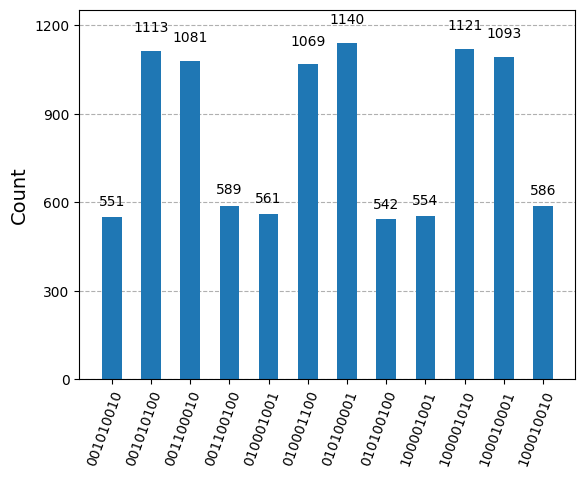

In [17]:
simulator2 = AerSimulator()
result2 = simulator2.run(transpile(problem2_qc, simulator2), shots=10000).result()
counts2 = result2.get_counts(problem2_qc)

plot_histogram(counts2)

*Time travel*

One very important aspect of quantum computing is that all quantum logic gates have an inverse. This means that it is possible to simulate time traveling by going to the end of an algorithm and coming back at the start simply using the inverse of every gate in a backward manner. 

The following cuircuit shows the algorithm seen in the video with an extra qubit used for deciding which door will be opened in the case the diamond is in safe 2 at the beginning. The circuit has been writen up to the point in time a safe has been opened by Kettu.

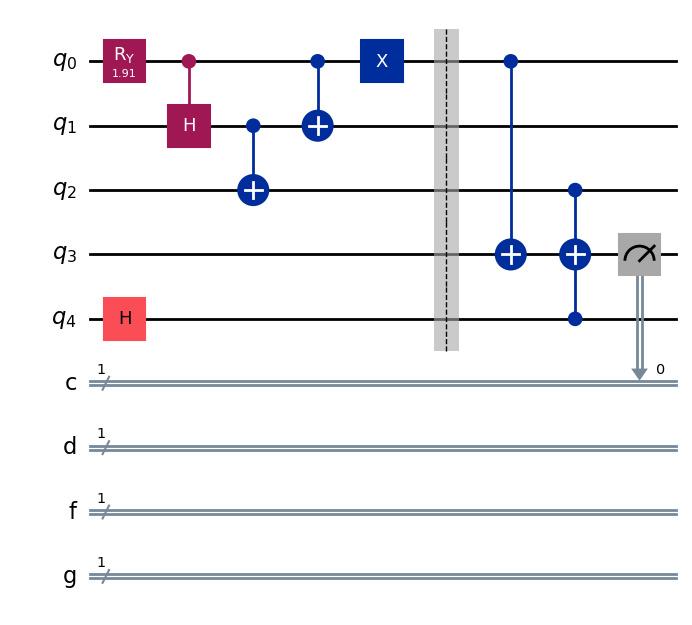

In [19]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(1, 'c')
creg_d = ClassicalRegister(1, 'd')
creg_f = ClassicalRegister(1, 'f')
creg_g = ClassicalRegister(1, 'g')
problem_qc = QuantumCircuit(qreg_q, creg_c, creg_d, creg_f, creg_g)

problem_qc.ry(1.910633, 0)
problem_qc.h(4)
problem_qc.ch(0, 1)
problem_qc.cx(1, 2)
problem_qc.cx(0, 1)
problem_qc.x(0)
problem_qc.barrier()
problem_qc.cx(0, 3)
problem_qc.ccx(2, 4, 3)
problem_qc.measure(3, 0)


problem_qc.draw("mpl")

**Question 3 : Write the rest of the algorithm to travel in time going back to the beginning, choosing a strategy that will allow you to proceed with the rest of the algorithmm and win the diamond everytime.**

*HINT 1*

Place the gates in reverse order upto the barrier and choose a safe the diamond is not in.

*HINT 2*

Use conditional swap to make sure you choose a safe the diamond is not in. 
problem_qc.swap(qreg_q[1], qreg_q[2]).c_if(creg_g, 1)



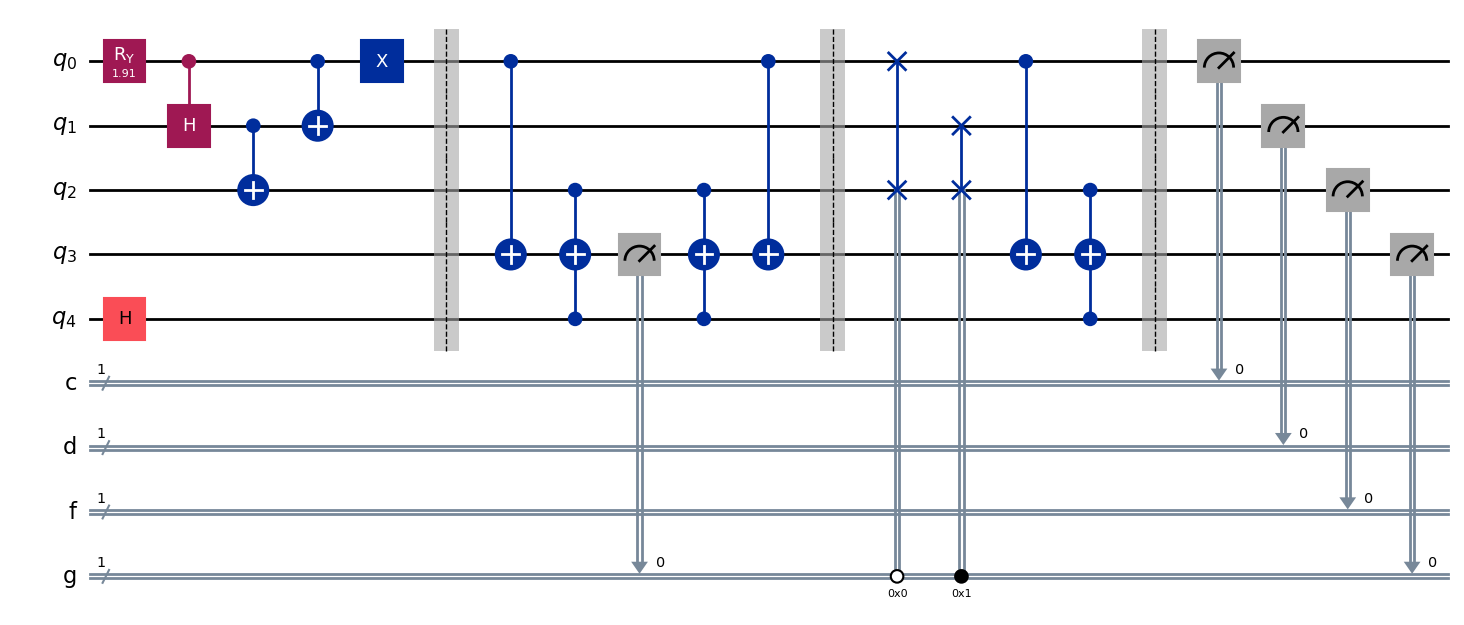

In [35]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(1, 'c')
creg_d = ClassicalRegister(1, 'd')
creg_f = ClassicalRegister(1, 'f')
creg_g = ClassicalRegister(1, 'g')
problem3_qc = QuantumCircuit(qreg_q, creg_c, creg_d, creg_f, creg_g)

prob_2on3 = 2 * np.arcsin(np.sqrt(2/3))
problem3_qc.ry(prob_2on3, 0)
problem3_qc.h(4)
problem3_qc.ch(0, 1)
problem3_qc.cx(1, 2)
problem3_qc.cx(0, 1)
problem3_qc.x(0)
problem3_qc.barrier()
problem3_qc.cx(0, 3)
problem3_qc.mcx([2, 4], 3)
problem3_qc.measure(3, creg_g[0])

problem3_qc.mcx([2, 4], 3)
problem3_qc.cx(0, 3)
problem3_qc.barrier()
problem3_qc.swap(0, 2).c_if(creg_g, 0)
problem3_qc.swap(1, 2).c_if(creg_g, 1)
#problem3_qc.x(0).c_if(creg_g, 1)
problem3_qc.cx(0, 3)
problem3_qc.mcx([2, 4], 3)

problem3_qc.barrier()
problem3_qc.measure(0, creg_c[0])
problem3_qc.measure(1, creg_d[0])
problem3_qc.measure(2, creg_f[0])
problem3_qc.measure(3, creg_g[0])

problem3_qc.draw("mpl")

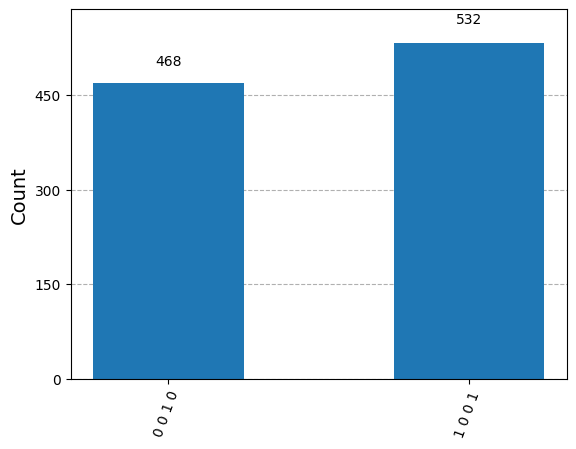

In [32]:
#backend = Aer.get_backend('qasm_simulator')
result3 = simulator2.run(transpile(problem3_qc, simulator2), shots=1000).result()
counts3  = result3.get_counts(problem3_qc)
plot_histogram(counts3)

Put the code for sending the circuit on the simulator with 1000 shots

**Question 4 : What is the meaning of the result?**

    [x] Changing your safe at the end will always lead to the diamond.
    [ ] There is still some uncertainty in the result.
    [ ] The diamond is always in safe 2.
    [ ] There is no more diamond.